<table style="width:100%; border: 0px solid black;">
    <tr style="width: 100%; border: 0px solid black;">
        <td style="width:75%; border: 0px solid black;">
            <a href="https://iciar2018-challenge.grand-challenge.org">
                <img src="https://iciar2018-challenge.grand-challenge.org/serve/public_html/header_small.png" />
            </a>
        </td>
    </tr>
</table>

# Capstone project
## Springboard # Data Science

### Section 1: Data cleaning
#### Goncalo Figueira
##### goncalochavesf@gmail.com

In [9]:
# Playing with paths
from __future__ import print_function
import sys
import os
print('Parent dir: ',os.path.dirname(os.path.abspath(os.pardir)))
print('Kernel dir: ', os.path.dirname(os.path.realpath(sys.argv[0])))
## Notebook directory
print('Script dir: ', os.getcwd())
## Move one folder back and that's my project directory
PROJ_ROOT = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print('Project dir: ',os.path.normpath(os.getcwd() + os.sep + os.pardir))
# Add src to path
sys.path.append(os.path.join(PROJ_ROOT, "src"))

Parent dir:  /Users/goncalofigueira/Desktop/gf
Kernel dir:  /Users/goncalofigueira/anaconda/lib/python3.6/site-packages/ipykernel
Script dir:  /Users/goncalofigueira/Desktop/gf/capstone-project/capstone_project
Project dir:  /Users/goncalofigueira/Desktop/gf/capstone-project


In [10]:
# Show project specifications and package versions
%load_ext watermark
%watermark -a "Goncalo Figueira" -d -t -v -p numpy,pandas -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Goncalo Figueira 2017-12-27 17:14:36 

CPython 3.6.0
IPython 5.1.0

numpy 1.13.1
pandas 0.19.2
Git hash: 8006bbf7ad13856e271011f72f7b8b16f2a7cea8


In [11]:
#### Import modules
from data_read.data_utils import getFileList, sortTarget, ReadImage
from data_vis.data_preview import DisplaySamples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [12]:
#==============================================================================
# Define path and image type
#==============================================================================
path = '/Volumes/LACIE SHARE/capstone_project/datasets/ICIAR2018_BACH_Challenge/Photos/'
im_type = '.tif'

In [13]:
#==============================================================================
# Get image list and info
#==============================================================================
im_folder = np.array(getFileList(path,im_type))
print('Number of images: ', im_folder.shape)

# Load csv with image information
im_info = pd.read_csv(getFileList(path,'.csv')[0], header = None)
im_info.columns = ['filename','target']
# match image and label indexes
im_info = sortTarget(im_folder,im_info)

Number of images:  (400,)


Image size: (1536, 2048, 3)


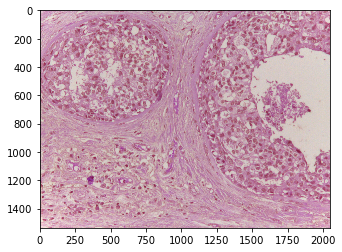

In [14]:
# Visualising a sample and displaying histogram
plt.figure(1)
im = ReadImage(im_folder[0])
plt.imshow(im)
print('Image size:', im.shape)

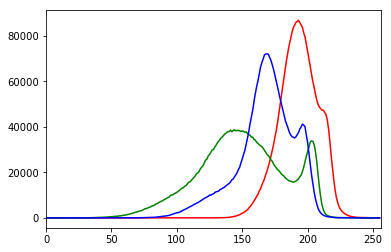

In [15]:
# Show image histogram per channel
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([im],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

100%|██████████| 20/20 [00:06<00:00,  3.32it/s]


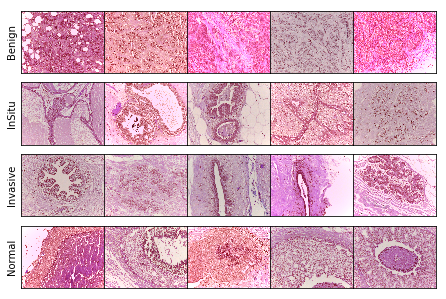

In [16]:
#==============================================================================
# Visualise samples from dataset
#==============================================================================
# Preview dataset - displays 0.5% random samples from each class
DisplaySamples(im_folder,im_info.target, class_perc = 0.05)
